# Image Thresholding
Learn to convert images to binary images using global thresholding, Adaptive thresholding, Otsu's binarization etc.


## Goal

Learn **simple thresholding**, **adaptive thresholding**, and **Otsu's thresholding**.  
You will learn the functions `cv.threshold` and `cv.adaptiveThreshold`.

---

## Simple Thresholding

Here, the matter is straight-forward. For every pixel, the same threshold value is applied.  
If the pixel value is smaller than or equal to the threshold, it is set to `0`, otherwise it is set to a **maximum value**.  

The function `cv.threshold` is used to apply the thresholding.

- The **first argument** is the source image, which should be a grayscale image.
- The **second argument** is the threshold value which is used to classify the pixel values.
- The **third argument** is the maximum value which is assigned to pixel values exceeding the threshold.
- OpenCV provides **different types of thresholding** which is given by the **fourth parameter** of the function.

Basic thresholding as described above is done by using the type `cv.THRESH_BINARY`.

All simple thresholding types are:

- `cv.THRESH_BINARY`
- `cv.THRESH_BINARY_INV`
- `cv.THRESH_TRUNC`
- `cv.THRESH_TOZERO`
- `cv.THRESH_TOZERO_INV`

See the documentation of the types for the differences.

The method returns **two outputs**:

1. The threshold that was used.
2. The thresholded image.

---


### This code compares the different simple thresholding types:


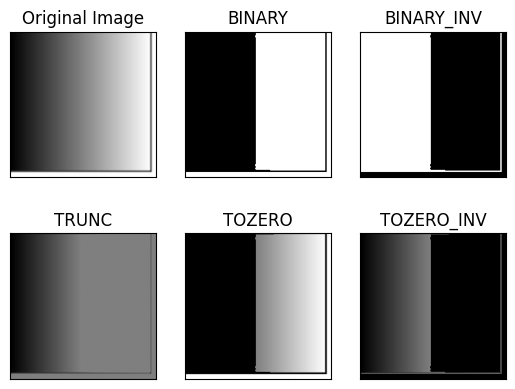

In [6]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('images/gradient.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

In [7]:
print("Threshold used:", ret)
print("Thresholded image:\n", thresh1)


Threshold used: 127.0
Thresholded image:
 [[  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


## Adaptive Thresholding

In the previous section, we used one **global value** as a threshold.  
But this might not be good in all cases, e.g. if an image has different lighting conditions in different areas.  

In that case, **adaptive thresholding** can help.  
Here, the algorithm determines the threshold for a pixel based on a **small region around it**.  
So we get different thresholds for different regions of the same image, which gives better results for images with **varying illumination**.

In addition to the parameters described above, the method `cv.adaptiveThreshold` takes three input parameters:

### `adaptiveMethod`

This decides how the threshold value is calculated:

- `cv.ADAPTIVE_THRESH_MEAN_C`:  
  The threshold value is the **mean of the neighbourhood area** minus the constant `C`.

- `cv.ADAPTIVE_THRESH_GAUSSIAN_C`:  
  The threshold value is a **Gaussian-weighted sum of the neighbourhood values** minus the constant `C`.

### `blockSize`

Determines the **size of the neighbourhood area**.

### `C`

A constant that is **subtracted** from the mean or weighted sum of the neighbourhood pixels.

---


### The code below compares **global thresholding** and **adaptive thresholding** for an image with varying illumination:

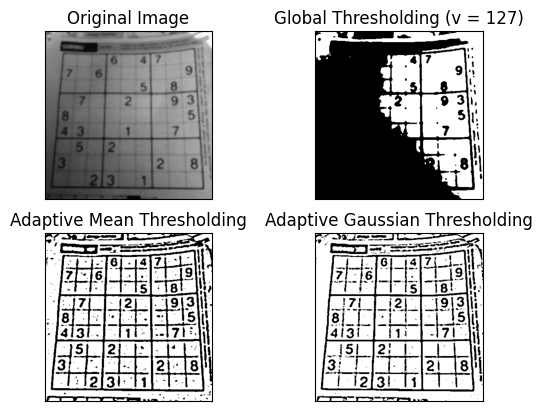

In [8]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('images/sudoku.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
img = cv.medianBlur(img,5)

ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## Otsu's Binarization

In global thresholding, we used an **arbitrarily chosen value** as a threshold.  
In contrast, **Otsu's method** avoids having to choose a value and determines it **automatically**.

Consider an image with only **two distinct image values** (a **bimodal** image), where the histogram consists of two peaks.  
A good threshold would be in the **middle of those two values**.  
Similarly, **Otsu's method** determines an **optimal global threshold** value from the image histogram.

To do this, the `cv.threshold()` function is used, where `cv.THRESH_OTSU` is passed as an **extra flag**.  
The threshold value can be chosen arbitrarily.  
The algorithm then **finds the optimal threshold value**, which is returned as the **first output**.

---

Check out the example below:

- The **input image** is a **noisy image**.
- In the **first case**, global thresholding with a value of 127 is applied.
- In the **second case**, Otsu's thresholding is applied **directly**.
- In the **third case**, the image is first filtered with a **5x5 Gaussian kernel** to remove the noise, then **Otsu thresholding** is applied.

See how **noise filtering improves the result**.


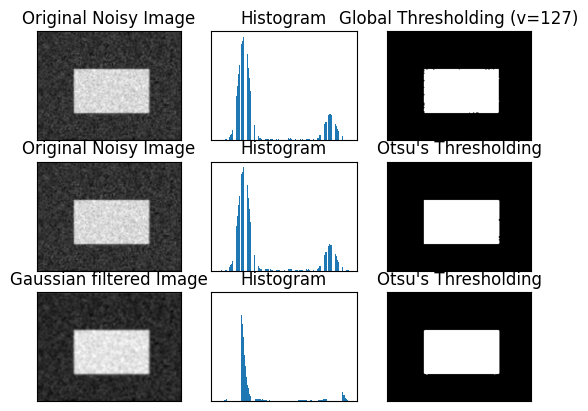

In [10]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('images/noisy2.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

# global thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

# Smoothing Images

Learn to blur the images, filter the images with custom kernels etc.


## Goals

Learn to:

- Blur images with various **low pass filters**
- Apply **custom-made filters** to images (2D convolution)

---

## 2D Convolution (Image Filtering)

As in one-dimensional signals, images can also be filtered with various types of filters like:

- **Low-pass filters (LPF)**: Help in **removing noise**, **blurring images**, etc.
- **High-pass filters (HPF)**: Help in **finding edges** in images.

OpenCV provides a function `cv.filter2D()` to **convolve a kernel with an image**.

As an example, we will try an **averaging filter** on an image.

A **5×5 averaging filter kernel** is defined as:


$$
K = \frac{1}{25}
\begin{bmatrix}
1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1
\end{bmatrix}
$$

The operation works like this:

- Place the **5×5 kernel** centered over a pixel.
- Add up the values of all **25 pixels** covered by the kernel.
- Compute the **average** of these values.
- Replace the **central pixel** with this average.

This process is repeated across the entire image.

### Illustration

Assume you're convolving this kernel over a grayscale image:

Image Patch (5×5 region):

\begin{bmatrix}
52 & 55 & 61 & 59 & 79 \\
62 & 59 & 55 & 104 & 94 \\
63 & 65 & \boxed{66} & 113 & 144 \\
64 & 70 & 70 & 126 & 154 \\
69 & 73 & 73 & 139 & 158 \\
\end{bmatrix}

Apply the averaging kernel:

$$
\text{New center pixel} = \frac{1}{25} \sum_{i=1}^{5} \sum_{j=1}^{5} I_{ij} \approx \frac{1800}{25} = 72
$$

So, the center pixel (66) is replaced with 72.

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('images/dog.png')
assert img is not None, "file could not be read, check with os.path.exists()"

kernel = np.ones((7,7),np.float32)/25
dst = cv.filter2D(img,-1,kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

## Image Blurring (Image Smoothing)

**Image blurring** is achieved by **convolving the image with a low-pass filter kernel**.  
It is useful for **removing noise**. It actually removes **high-frequency content** (e.g., noise, edges) from the image.  
So edges are **blurred a little** bit in this operation (though there are also blurring techniques that don't blur the edges).

OpenCV provides **four main types** of blurring techniques.

---

### 1. Averaging

This is done by **convolving an image with a normalized box filter**.  
It simply takes the **average of all the pixels** under the kernel area and replaces the **central element**.

This is done by the function `cv.blur()` or `cv.boxFilter()`.  
Check the docs for more details about the kernel.

We must specify the **width and height** of the kernel.

A **3×3 normalized box filter** looks like this:

$$
\frac{1}{9}
\begin{bmatrix}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1
\end{bmatrix}
$$


In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('images/dog.png')
assert img is not None, "file could not be read, check with os.path.exists()"

blur = cv.blur(img,(25,25))

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

### 2. Gaussian Blurring

In this method, instead of a **box filter**, a **Gaussian kernel** is used. Gaussian kernels smooth the image in a natural, gradual way. This is more effective than just averaging (box blur), because it respects local structure better.


It is done with the function `cv.GaussianBlur()`.

You must specify:

- The **width and height** of the kernel (must be **positive and odd**).
- The **standard deviation** in the X and Y directions: `sigmaX` and `sigmaY`.

Behavior notes:

- If only `sigmaX` is specified, `sigmaY` is taken as the same value.
- If both `sigmaX` and `sigmaY` are set to `0`, they are automatically **calculated from the kernel size**.

Gaussian blurring is **highly effective** at removing **Gaussian noise** from an image.

If you want, you can **create a Gaussian kernel manually** using the function:  
`cv.getGaussianKernel()`

---

The above code (e.g., from averaging blur) can be modified to use Gaussian blurring like so:

In [ ]:
blur = cv.GaussianBlur(img, (25, 25), sigmaX=0)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

### 3. Median Blurring

In **median blurring**, the function `cv.medianBlur()` takes the **median** of all the pixels under the kernel area,  
and the **central element** is replaced with this **median value**.

This method is **highly effective** against **salt-and-pepper noise** in an image.

#### Key differences:

- In other filters (e.g., average, Gaussian), the central element is a **newly computed value**, possibly one not present in the image.
- In **median blurring**, the central element is always replaced by an **existing pixel value** from the neighborhood.
- This makes it especially good at **preserving edges** while reducing impulse noise.

> 🔸 The kernel size must be a **positive odd integer** (e.g., 3, 5, 7).

---

In this demo, we added **50% salt-and-pepper noise** to the original image and applied median blurring.  
Check the result:

In [ ]:
img = cv.imread('images/dog_salt_pepper.png')
blur = cv.medianBlur(img,5)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

# Image Gradients

Learn to find image gradients, edges etc.



## Goal

In this chapter, we will learn to:

- Find **image gradients**, **edges**, etc.
- Use the following OpenCV functions: `cv.Sobel()`, `cv.Scharr()`, `cv.Laplacian()`, etc.

---

## Theory

OpenCV provides three types of **gradient filters** (or **high-pass filters**):

- Sobel  
- Scharr  
- Laplacian  

We will look at each of them in detail.

---

### 1. Sobel and Scharr Derivatives

- The **Sobel operator** is a combination of **Gaussian smoothing** and **differentiation**, making it more **robust to noise**.
- You can specify the direction of the derivative:
  - `xorder = 1, yorder = 0` → horizontal gradient  
  - `xorder = 0, yorder = 1` → vertical gradient  
- You can also specify the **kernel size** using the `ksize` argument.
- If `ksize = -1`, a **3×3 Scharr filter** is used, which often gives better results than a 3×3 Sobel filter.

📄 *See the OpenCV documentation for the exact kernels used.*

---

### 2. Laplacian Derivatives

The **Laplacian** of an image is computed using the following formula:

$$
\Delta f = \frac{\partial^2 f}{\partial x^2} + \frac{\partial^2 f}{\partial y^2}
$$

Each second-order derivative is computed using **Sobel derivatives** internally.

If `ksize = 1`, the following kernel is typically used:

$$
\begin{bmatrix}
0 & 1 & 0 \\
1 & -4 & 1 \\
0 & 1 & 0
\end{bmatrix}
$$

This kernel emphasizes areas of **rapid intensity change**, helping in **edge detection**.


In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('images/sudoku.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

laplacian = cv.Laplacian(img,cv.CV_64F)
sobelx = cv.Sobel(img,cv.CV_64F,1,0,ksize=5)
sobely = cv.Sobel(img,cv.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

# Canny Edge Detection

Learn to find edges with Canny Edge Detection



## Goal

In this section, we will learn about:

- What **Canny edge detection** is
- How to use OpenCV’s `cv.Canny()` function

---

## What is Canny Edge Detection?

Canny edge detection is a popular way to **find edges** in an image.  
It goes through several steps to make sure the edges it finds are **clear and accurate**.

---

## Steps in Canny Edge Detection

### 1. Noise Reduction

First, we remove noise from the image using a **Gaussian blur**.  
This makes the image smoother and helps avoid detecting false edges caused by noise.

---

### 2. Find Image Gradients

Next, we check how much the image changes in the **X and Y directions** using a filter called **Sobel**.

From this, we calculate:

- **Gradient magnitude** – how strong the change is  
- **Gradient direction** – where the change is happening

These help us understand where the edges are.

---

### 3. Non-Maximum Suppression

Now we thin the edges by removing weak or unnecessary pixels.

For each pixel:

- We check if it is the **strongest** compared to its neighbors **in the direction of the edge**
- If it is not the strongest, we remove it (set to 0)

This leaves us with **thin, clean edges**.

---

### 4. Hysteresis Thresholding

Finally, we decide which edges to **keep** and which to **remove**, using two thresholds:

- If the pixel value is **above the high threshold**, we **keep it** – it’s a strong edge
- If it’s **below the low threshold**, we **remove it**
- If it’s **between**, we keep it **only if it’s connected** to a strong edge

This step helps get rid of small false edges and keeps only the important ones.

---

## Final Result

After all the steps, we get an image with **clean, clear edges**.

---

## Using `cv.Canny()` in OpenCV

OpenCV provides a function that does all the steps for you:


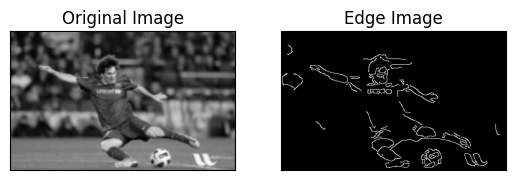

In [11]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('images/messi.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
edges = cv.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

# Contours

Learn to find and draw Contours



## Goal

- Understand what **contours** are  
- Learn how to **find** and **draw** contours using OpenCV  
- Use functions like: `cv.findContours()`, `cv.drawContours()`

---


## What Are Contours?

**Contours** are simply curves that connect **continuous points** along the boundary of objects that have the **same color or intensity**.

They are useful for:

- **Shape analysis**
- **Object detection**
- **Object recognition**

---

## Tips for Finding Contours

- For better results, use **binary images** (black and white).
- Apply **thresholding** or **Canny edge detection** before finding contours.
- Since OpenCV 3.2, `cv.findContours()` does **not modify** the original image.
- In OpenCV, finding contours means finding **white objects** on a **black background**.
  - So make sure your object is **white** and the background is **black**.

---

In [12]:
import numpy as np
import cv2 as cv

img = cv.imread('images/contours_test.png')
assert img is not None, "file could not be read, check with os.path.exists()"
imgray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

See, there are **three arguments** in the `cv.findContours()` function:

1. **Source image** – usually a binary image.
2. **Contour retrieval mode** – tells how to retrieve contours (e.g. `cv.RETR_TREE`, `cv.RETR_EXTERNAL`, etc.).
3. **Contour approximation method** – defines how to approximate the contour shape (e.g. `cv.CHAIN_APPROX_SIMPLE`, `cv.CHAIN_APPROX_NONE`).

The function returns:

- `contours`: A **Python list** of all the contours found in the image.
- `hierarchy`: Information about the **image topology** (parent-child relationship between contours).

Each individual contour is a **NumPy array** of `(x, y)` coordinates of the **boundary points** of the object.


## How to draw the contours?

To **draw the contours**, the `cv.drawContours()` function is used.  
It can also be used to draw any shape, as long as you have its **boundary points**.

### Parameters:

1. **First argument** – the **source image**
2. **Second argument** – the **contours**, passed as a **Python list**
3. **Third argument** – the **index** of the contour to draw  
   - To draw **all contours**, pass `-1`
4. **Remaining arguments** – define the **color**, **thickness**, and other drawing options

---

This function is very flexible and useful for visualizing the detected shapes and object boundaries.


In [13]:
# To draw all the contours in an image:

cv.drawContours(img, contours, -1, (0,255,0), 3)

array([[[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       ...,

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]]

### Visualizing and Detecting Multiple Contours with OpenCV


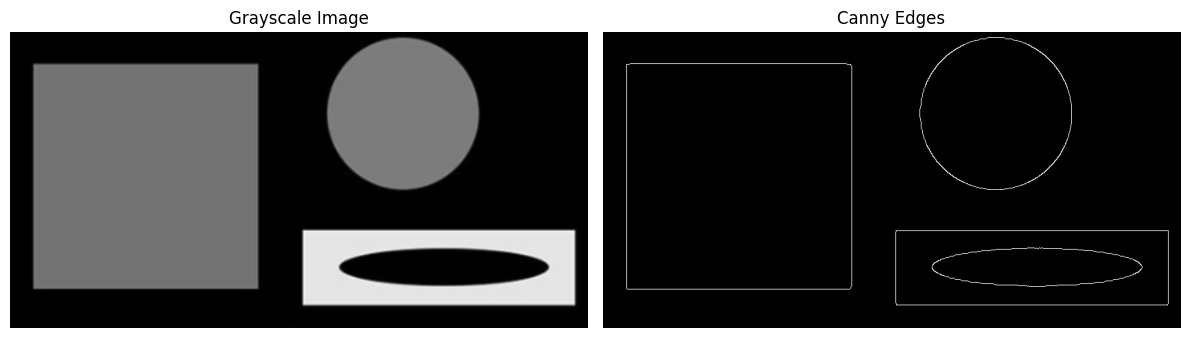

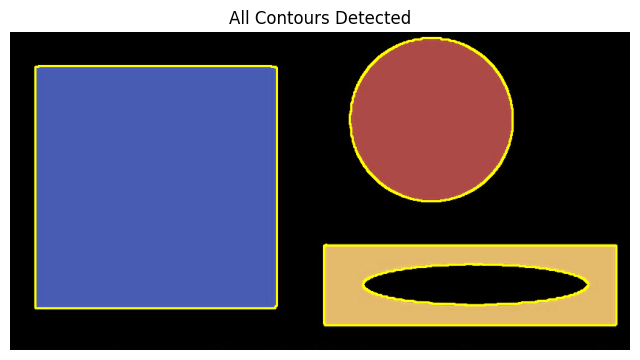

In [14]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('images/contours_test2.png')

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray, 50, 150)

# Plot grayscale and edges side-by-side
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges')
plt.axis('off')

plt.tight_layout()
plt.show()

# Find contours
contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw all contours
output = image.copy()
cv2.drawContours(output, contours, -1, (0, 255, 255), 2)

# Display using matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.title("All Contours Detected")
plt.axis('off')
plt.show()


# Template Matching

Learn to search for an object in an image using Template Matching



## Goals

In this section, you will learn:

- How to **find objects in an image** using **Template Matching**
- How to use `cv.matchTemplate()` and `cv.minMaxLoc()` in OpenCV

---



## What is Template Matching?

**Template Matching** is a method to **find a small image (template)** inside a **larger image**.

OpenCV provides the function `cv.matchTemplate()` for this.

---

### How it works:

- The **template image** is slid across the **input image**, like a sliding window.
- At each position, it compares how similar the template is to that part of the image.
- It produces a **grayscale result image**:
  - Each pixel shows how well that area of the image matches the template.
  - Brighter areas mean better matches (depending on method used).

---

### Output Size:

If the input image is size `(W × H)`  
and the template is size `(w × h)`,  
then the output will be size:  
`(W - w + 1, H - h + 1)`

---

### Locating the Best Match:

Once you have the result image:

- Use `cv.minMaxLoc()` to find the **best match location**
  - It gives the **minimum and maximum values and their positions**
- Use the location as the **top-left corner** of the detected region
- Draw a rectangle with the same size as the template at that spot

---

This is how you detect where the template appears in the larger image!

### Template Matching in OpenCV
Here, as an example, we will search for Messi's face in his photo.

We will try all the comparison methods listed below:

| Method             | Description                                                 | Best Match Location |
| ------------------ | ----------------------------------------------------------- | ------------------- |
| `TM_SQDIFF`        | Sum of squared differences between template and image patch | **Minimum value**   |
| `TM_SQDIFF_NORMED` | Same as above, but normalized                               | **Minimum value**   |
| `TM_CCORR`         | Cross-correlation between template and image patch          | **Maximum value**   |
| `TM_CCORR_NORMED`  | Same as above, but normalized                               | **Maximum value**   |
| `TM_CCOEFF`        | Correlation coefficient (compares mean-centered patterns)   | **Maximum value**   |
| `TM_CCOEFF_NORMED` | Same as above, but normalized (values between -1 and 1)     | **Maximum value**   |


so that we can see how their results look like:

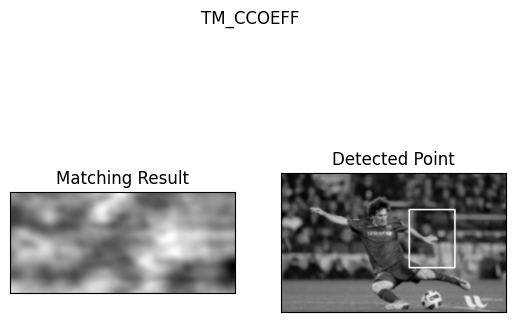

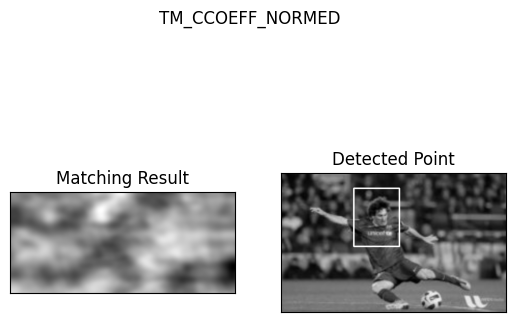

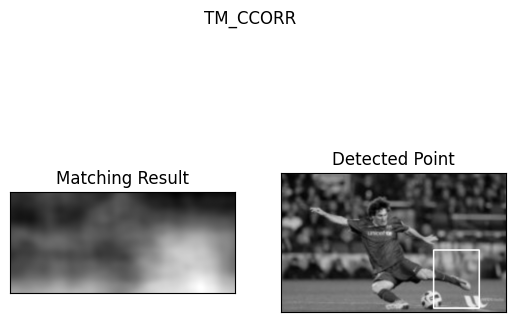

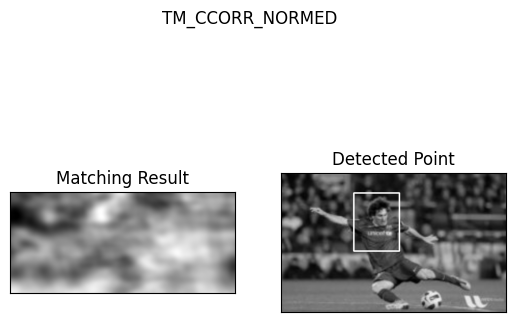

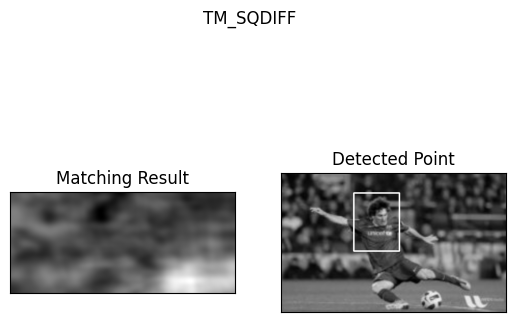

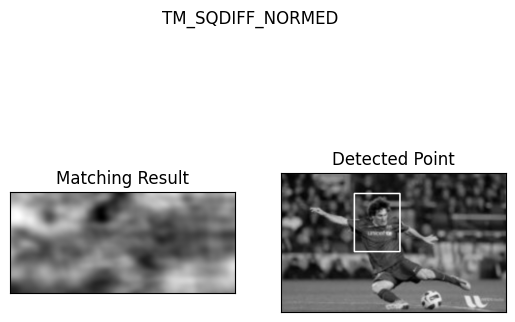

In [15]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('images/messi.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
img2 = img.copy()
template = cv.imread('images/template.png', cv.IMREAD_GRAYSCALE)
assert template is not None, "file could not be read, check with os.path.exists()"
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['TM_CCOEFF', 'TM_CCOEFF_NORMED', 'TM_CCORR',
            'TM_CCORR_NORMED', 'TM_SQDIFF', 'TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = getattr(cv, meth)

    # Apply template Matching
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img,top_left, bottom_right, 255, 2)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()

# Image Segmentation with Watershed Algorithm

Learn to segment images with watershed segmentation

## Goal

In this chapter, you will learn:

- How to use **marker-based image segmentation** using the **Watershed algorithm**
- How to apply `cv.watershed()` in OpenCV

---


## What is the Watershed Algorithm?

Think of a **grayscale image** as a **3D landscape**:

- **Bright areas** (high intensity) are like **hills or peaks**
- **Dark areas** (low intensity) are like **valleys**

The idea is to "flood" the valleys with **water from different sources (labels)**.  
As the water rises, if two labeled regions are about to merge, a **barrier** is built between them.

Once everything is filled, these barriers form the **boundaries between regions** — this is the **segmentation result**.

---

## Problem with Basic Watershed

If we apply this blindly, we often get **too many small regions** (over-segmentation), especially due to **noise**.

---

## Marker-Based Watershed (OpenCV)

OpenCV uses an improved version called **marker-based watershed**, which gives better results.

### How it works:

1. **You provide markers** to guide the segmentation.
   - **Foreground** (sure object) → label with **1**
   - **Background** (sure non-object) → label with **2**
   - **Unknown regions** (not clear whether it belongs to the foreground or the background) → label with **0**

2. These markers act like **seeds**.

3. When you call `cv.watershed()`:
   - It fills the regions based on your markers.
   - The **boundaries** between objects are marked with **-1** in the result.

---

This is a powerful technique for **separating overlapping objects** or **segmenting complex regions** interactively.

## Code

Below we will see an example on how to use the Distance Transform along with watershed to segment mutually touching objects.

Consider the coins image below, the coins are touching each other. Even if you threshold it, it will be touching each other.

We start with finding an approximate estimate of the coins. For that, we can use the Otsu's binarization.



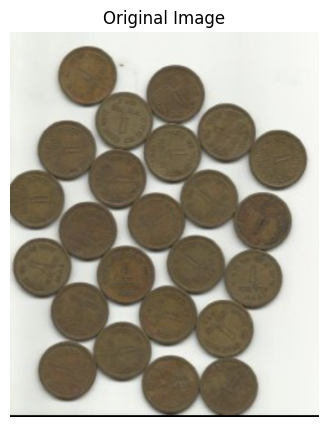

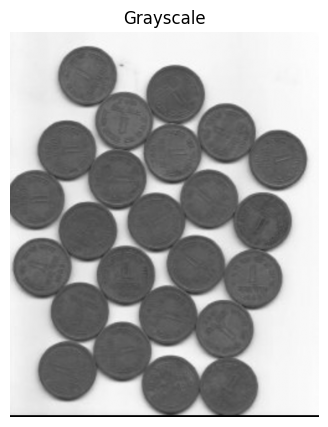

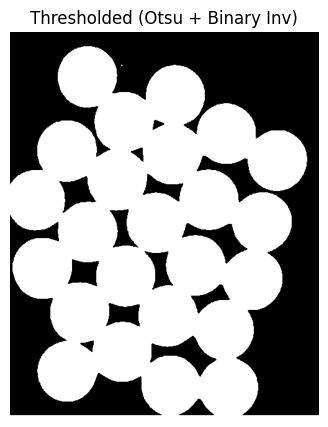

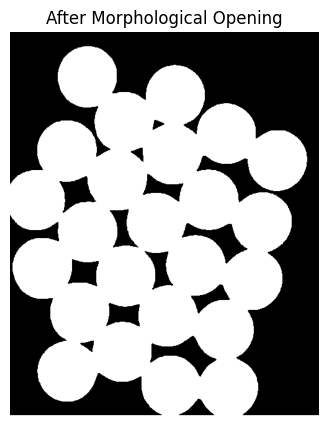

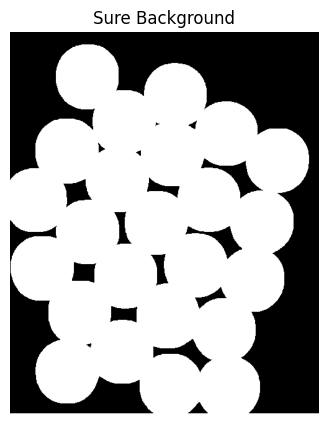

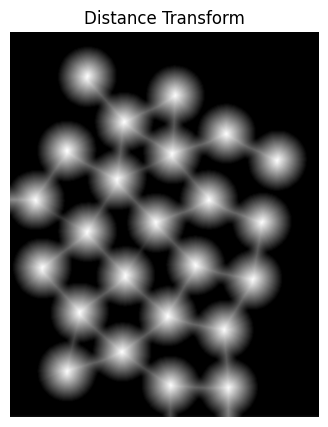

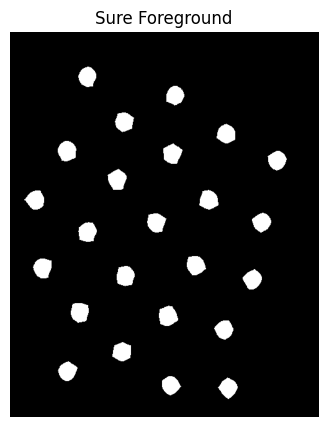

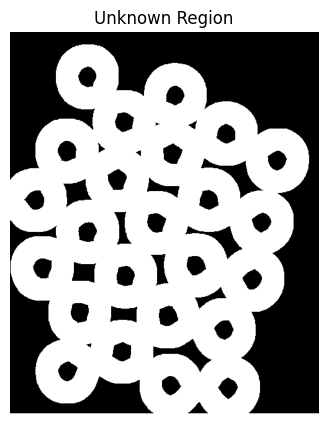

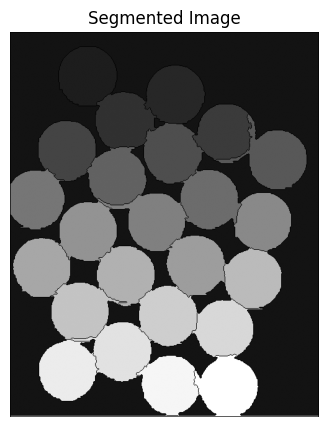

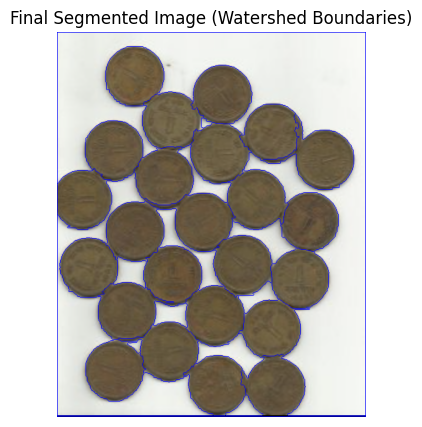

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

def show(title, image, cmap='gray'):
    plt.figure(figsize=(6, 5))
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load the image
img = cv.imread('images/coins.png')
assert img is not None, "file could not be read, check with os.path.exists()"

# Original Image
show("Original Image", cv.cvtColor(img, cv.COLOR_BGR2RGB), cmap=None)

# Convert to Grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
show("Grayscale", gray)

# Thresholding (Otsu's + Inverse Binary)
ret, thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
show("Thresholded (Otsu + Binary Inv)", thresh)

# Noise Removal (Morphological Opening)
kernel = np.ones((3, 3), np.uint8)
opening = cv.morphologyEx(thresh, cv.MORPH_OPEN, kernel, iterations=2)
show("After Morphological Opening", opening)

# Sure Background (Dilation)
sure_bg = cv.dilate(opening, kernel, iterations=3)
show("Sure Background", sure_bg)

# Sure Foreground (Distance Transform + Threshold)
dist_transform = cv.distanceTransform(opening, cv.DIST_L2, 5)
show("Distance Transform", dist_transform)
ret, sure_fg = cv.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
show("Sure Foreground", sure_fg)

# Unknown Region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg, sure_fg)
show("Unknown Region", unknown)

# Marker Labelling
ret, markers = cv.connectedComponents(sure_fg)

# Increment marker labels so background is not 0 but 1
markers = markers + 1

# Mark unknown regions as 0
markers[unknown == 255] = 0

# Apply Watershed
markers = cv.watershed(img, markers)

show("Segmented Image", markers)

# Mark boundaries in red on original image
segmented_img = img.copy()
segmented_img[markers == -1] = [255, 0, 0]  # boundary marked in red

# Display final segmented image
show("Final Segmented Image (Watershed Boundaries)", cv.cvtColor(segmented_img, cv.COLOR_BGR2RGB), cmap=None)
